# Topic: H.A.R.N.
## Scope: Agriculture
### Project Team: Maitri, Faryar and Mrunali


# A. Image Analysis & Preprocessing

##  Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import cv2
import os
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16



%matplotlib inline

## Load Dataset

### Path Configuration

In [ ]:
healthy_dir = '/content/drive/MyDrive/Dataset/HARN DS1/Healthy'
n_def_dir = '/content/drive/MyDrive/Dataset/HARN DS1/N_Deficiency'
p_def_dir = '/content/drive/MyDrive/Dataset/HARN DS1/P_Deficiency'
k_def_dir = '/content/drive/MyDrive/Dataset/HARN DS1/K_Deficiency'
dataset_dir = '/content/drive/MyDrive/Dataset/HARN DS1'

In [ ]:
def load_random_imgs_from_folder(folder):
  plt.figure(figsize=(20,20))
  for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.xlabel(f'Image Shape: {img.shape}')
    plt.imshow(img)

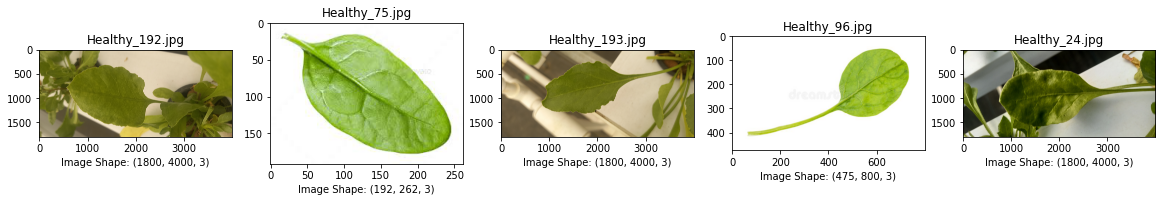

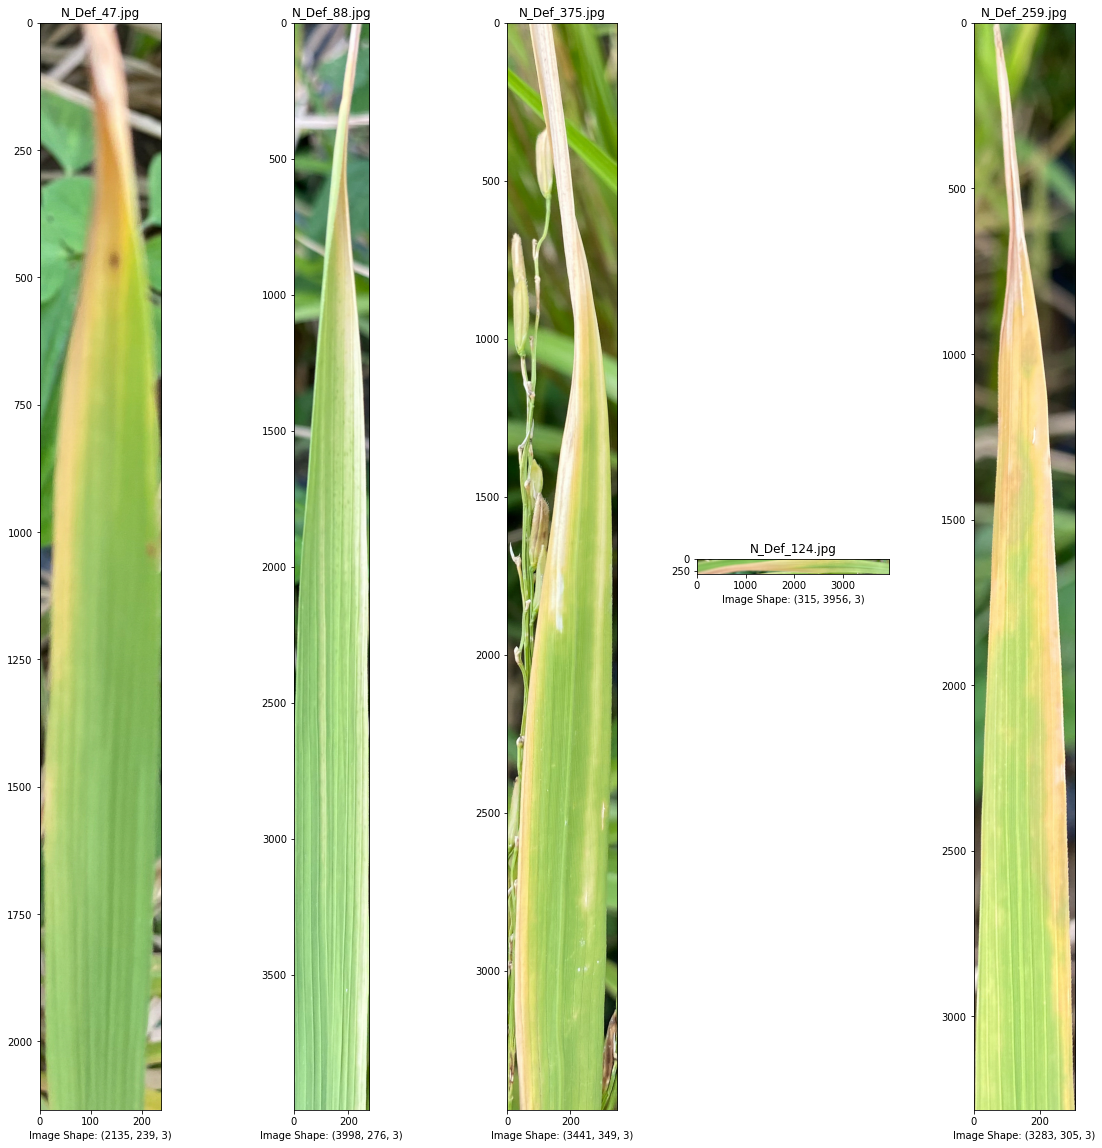

In [ ]:
load_random_imgs_from_folder(healthy_dir)
print('\n\n')
load_random_imgs_from_folder(n_def_dir)

## Renaming the file names

In [ ]:
def rename_imgs(category, path):
  # print(os.getcwd())
  os.chdir(path)
  print(os.getcwd())
  for index, filename in enumerate(os.listdir(".")):
    # print(filename, index)
    os.rename(filename, f'{category}_{index+1}.jpg')
    # print(filename)

In [ ]:
rename_imgs('Healthy', healthy_dir)
rename_imgs('N_Def', n_def_dir)
rename_imgs('P_Def', p_def_dir)
rename_imgs('K_Def', k_def_dir)

/content/drive/MyDrive/Dataset/HARN DS1/Healthy
/content/drive/MyDrive/Dataset/HARN DS1/N_Deficiency
/content/drive/MyDrive/Dataset/HARN DS1/P_Deficiency
/content/drive/MyDrive/Dataset/HARN DS1/K_Deficiency


## Create a dataframe


In [ ]:
labels=[]
for i in os.listdir(dataset_dir):
  labels+=[i]

print(labels)

['N_Deficiency', 'P_Deficiency', 'K_Deficiency', 'Healthy']


In [ ]:
IMG_SIZE = 224

In [ ]:
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
              if img[-3:] != 'txt':
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
  

In [ ]:
dataset = get_data(dataset_dir)
np.random.shuffle(dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
train = dataset[:817]
val = dataset[817:1090]
test = dataset[1090:]

In [ ]:
train_df = pd.DataFrame(train,columns=['Feature','Label'])

In [ ]:
train_df.head(5)

,Feature,Label
0,"[[[84, 97, 80], [81, 93, 78], [86, 98, 83], [8...",2
1,"[[[193, 215, 34], [192, 214, 29], [192, 213, 2...",1
2,"[[[253, 247, 241], [253, 245, 238], [249, 243,...",0
3,"[[[99, 153, 77], [98, 152, 76], [99, 153, 75],...",2
4,"[[[67, 109, 55], [66, 109, 55], [66, 109, 55],...",1


In [ ]:
l=[]
for i in train_df['Label']:
  l.append(labels[i])

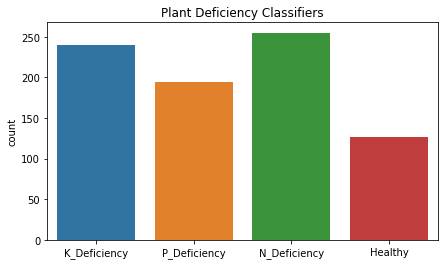

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x=l);
plt.title('Plant Deficiency Classifiers');

## Splitting the dataset

In [ ]:
# X, test_img, Y, test_labels = train_test_split(df['Images'], df['Label'], test_size=0.2, shuffle = True, random_state = 2)

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 2)

In [ ]:
# # checking the balance of classifiers in the y_train
# print(y_train.value_counts())
# plt.figure(figsize=(7,4))
# sns.countplot(y_train);
# plt.title('Malaria Classifiers');

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
test_img = []
test_label = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  test_img.append(feature)
  test_label.append(label)

# Image Preprocessing

## Normalizing the dataset

In [ ]:
np.array(x_train).max()

255

Text(0.5, 1.0, 'P_Deficiency')

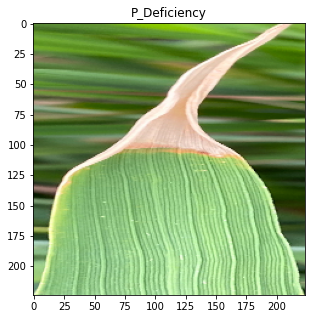

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [ ]:
x_train = np.array(x_train)/255
y_train = np.array(y_train)
x_val = np.array(x_val)/255
y_val = np.array(y_val)

In [ ]:
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((817, 224, 224, 3), (817,), (273, 224, 224, 3), (273,))

In [ ]:
type(y_train[0])

numpy.int64

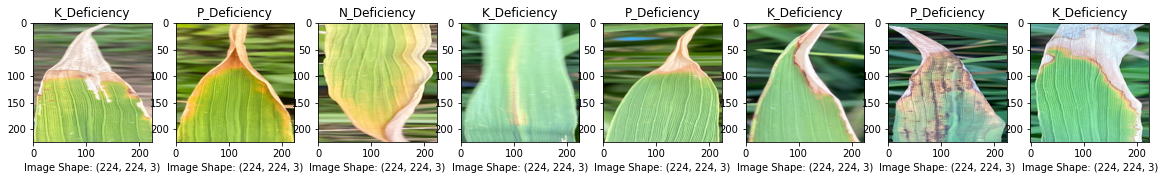

In [ ]:
plt.figure(figsize=(20,20))

for i in range(8):
  img = x_train[i]
  ax=plt.subplot(1,8,i+1)
  ax.title.set_text(labels[y_train[i]])
  plt.xlabel(f'Image Shape: {img.shape}')
  plt.imshow(img)


## Image Augmentation

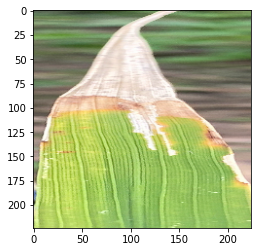

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train[0].shape

(224, 224, 3)

In [ ]:
y_train=y_train.reshape(817,1)
y_val=y_val.reshape(273,1)

# Functions

In [ ]:
def learning_curve(model_fit, key='acc', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'test'], loc='best')
    plt.show()

In [ ]:
def fbeta(y_true, y_pred, threshold_shift=0):
    beta_squared = 4

    y_pred = K.clip(y_pred, 0, 1)
 
    y_pred_bin = K.round(y_pred + threshold_shift)
 
    tp = K.sum(K.round(y_true * y_pred_bin)) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)))
 
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
 
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

# Modelling

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
# input_channels = 3
# batch_size = 64

In [ ]:
# model = Sequential()
# model.add(Flatten())
# model.add(Dense(128, activation = tf.nn.relu))
# model.add(Dense(128, activation = tf.nn.relu))
# model.add(Dense(4, activation = tf.nn.softmax))

model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=x_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 dense (Dense)               (None, 222, 222, 64)      4160      
                                                                 
 dropout (Dropout)           (None, 222, 222, 64)      0         
                                                                 
 dense_1 (Dense)             (None, 222, 222, 64)      4160      
                                                                 
 dropout_1 (Dropout)         (None, 222, 222, 64)      0         
                                                                 
 flatten (Flatten)           (None, 3154176)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               4

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# opt = Adam(learning_rate=0.0001)
# model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
# model.fit(x_train, y_train, epochs=3)

In [ ]:
hist=model.fit(x_train,y_train,batch_size=20,epochs=10,verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
